In [ ]:
%load_ext autoreload
%autoreload 2

import json
import os
import pickle
from collections import defaultdict
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
from matplotlib.lines import Line2D

from plot_utils import (load_chid, median_score_compound, median_score_single,
                        npflatten, plot_optimizer, plot_wrapper,
                        ratio_active_compound, ratio_active_single)

In [ ]:
# rcParams.update(matplotlib.rcParamsDefault)
params = {
    #    'axes.labelsize': 8,
    'font.size': 14,

    #    'legend.fontsize': 14,
    #    'xtick.labelsize': 10,
    #    'ytick.labelsize': 10,
    'text.usetex': False,
    #    'figure.figsize': [4.5, 4.5]
}
rcParams.update(params)

columns = ['AssayID', 'TargetName', 'TargetID']
rows = [('CHEMBL3888429', 'JAK2', 'CHEMBL2971'),
        ('CHEMBL1909203', 'EGFR', 'CHEMBL203'),
        ('CHEMBL1909140', 'DRD2', 'CHEMBL217')]

assay_info = pd.DataFrame(rows, columns=columns)
chid_name = dict(zip(assay_info['AssayID'], assay_info['TargetName']))

order = ['Split1', 'Split2', 'Split1_alt']
col_dict = dict(zip(order, ['blue', 'red', 'green']))
col_dict2 = dict(zip(order, ['cyan', 'magenta', 'green']))
legend_dict = dict(zip(order, ['Optimizer', 'Control', 'Control 2']))

# Plot results of genetic algorithm

results/graph_ga/CHEMBL3888429
results/graph_ga/CHEMBL1909203
results/graph_ga/CHEMBL1909140


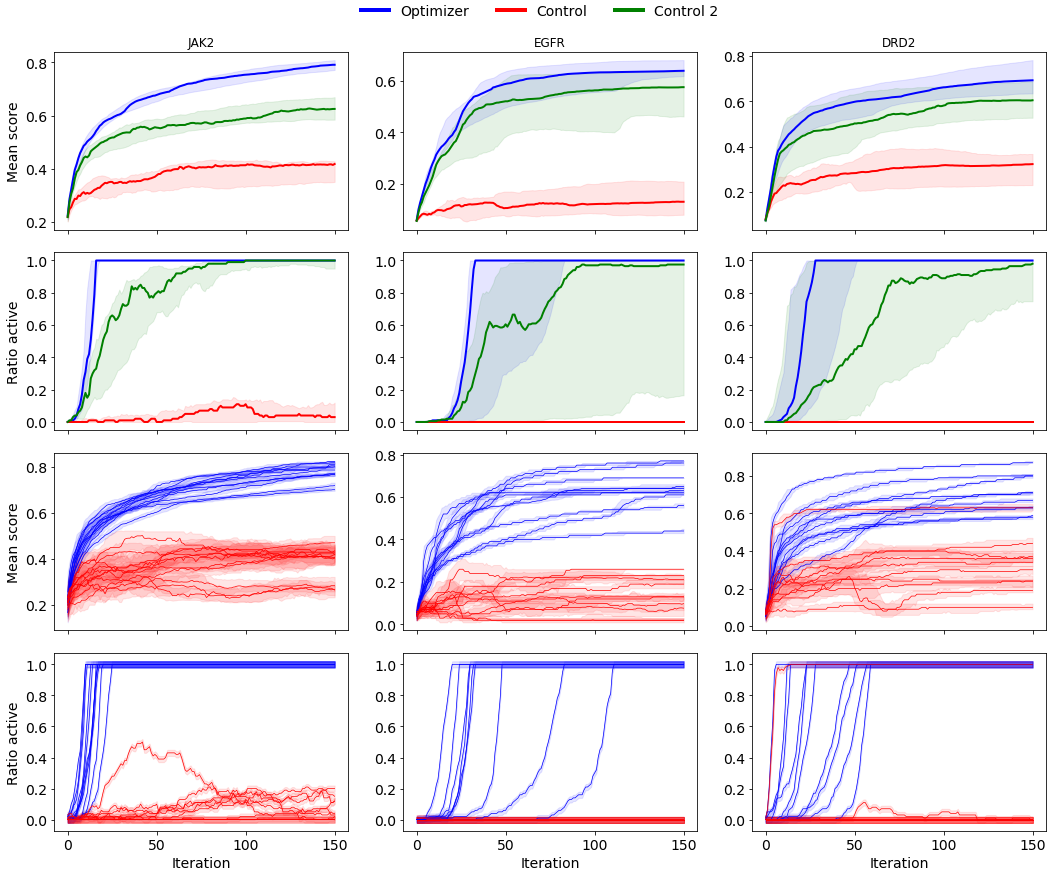

In [ ]:
results_root = './results'
optimizer = 'graph_ga'
results_dir = Path(results_root)

# some variables for axis labels
xlabel = None
ms = 'Mean score'
ra = 'Ratio active'

# TODO: make better yticks
fig, axes = plt.subplots(nrows=4, ncols=len(
    chids), figsize=(15, 12), sharex=True)

# store aucs while looping
aucs = {}
for i, chid in enumerate(chids):
    print(results_dir/optimizer/chid)

    preds_internal, preds_external, auc = load_chid(
        results_dir/optimizer/chid, order, hack=True)
    aucs[chid] = auc

    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                 ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=None, ax=axes[0][i], legend=False, lw=2)
    plot_wrapper(preds_internal, ratio_active_compound, name='ratio_active_compound', xlabel=xlabel,
                 ylabel=ra, col_dict=col_dict, legend_dict=legend_dict, skip=None, ax=axes[1][i], legend=False, lw=2)
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms,
                 col_dict=col_dict, legend_dict=legend_dict, skip=True, ax=axes[2][i], legend=False, lw=0.7)
    xlabel = 'Iteration'
    plot_wrapper(preds_internal, ratio_active_single, name='ratio_active_single', xlabel=xlabel, ylabel=ra,
                 col_dict=col_dict, legend_dict=legend_dict, skip=True, ax=axes[3][i], legend=False, lw=0.7)
    xlabel = None
    ms, ra = None, None

for i, chid in enumerate(chids):
    axes[0][i].set_title(chid_name[chid], fontsize=12)
custom_lines = [Line2D([0], [0], color=color, lw=4)
                for color in col_dict.values()]
fig.legend(custom_lines, list(legend_dict.values()), loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 1.025), frameon=False)
fig.tight_layout()
plt.savefig(results_dir/optimizer/'all_curves.pdf')

# SMILES hillclimb results

results/lstm_hc/CHEMBL3888429
results/lstm_hc/CHEMBL1909203
results/lstm_hc/CHEMBL1909140


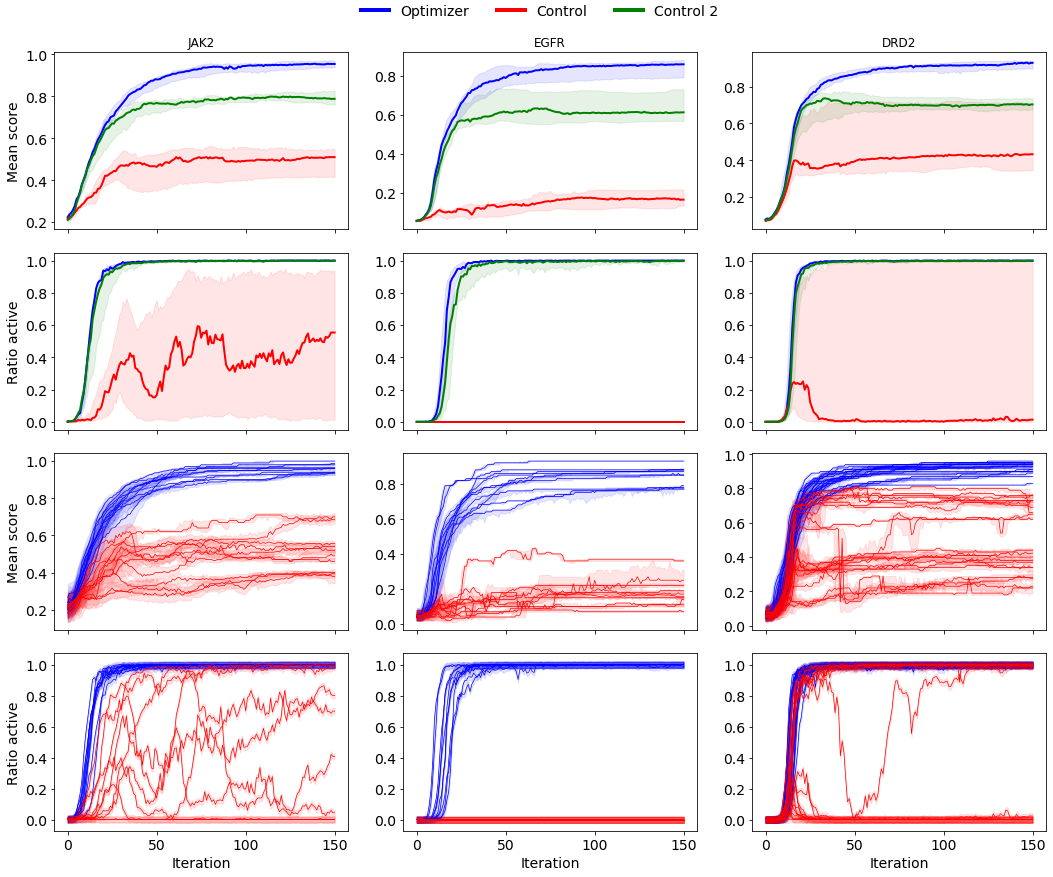

In [ ]:
results_root = './results'
optimizer = 'lstm_hc'
results_dir = Path(results_root)
chids = next(os.walk(results_dir/optimizer))[1]


# some variables for axis labels
xlabel = None
ms = 'Mean score'
ra = 'Ratio active'

# TODO: make better yticks
fig, axes = plt.subplots(nrows=4, ncols=len(
    chids), figsize=(15, 12), sharex=True)

# store aucs while looping
aucs = {}
for i, chid in enumerate(chids):
    print(results_dir/optimizer/chid)

    preds_internal, preds_external, auc = load_chid(
        results_dir/optimizer/chid, order, hack=True)
    aucs[chid] = auc

    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                 ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=None, ax=axes[0][i], legend=False, lw=2)
    plot_wrapper(preds_internal, ratio_active_compound, name='ratio_active_compound', xlabel=xlabel,
                 ylabel=ra, col_dict=col_dict, legend_dict=legend_dict, skip=None, ax=axes[1][i], legend=False, lw=2)
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms,
                 col_dict=col_dict, legend_dict=legend_dict, skip=True, ax=axes[2][i], legend=False, lw=0.7)
    xlabel = 'Iteration'
    plot_wrapper(preds_internal, ratio_active_single, name='ratio_active_single', xlabel=xlabel, ylabel=ra,
                 col_dict=col_dict, legend_dict=legend_dict, skip=True, ax=axes[3][i], legend=False, lw=0.7)
    xlabel = None
    ms, ra = None, None

for i, chid in enumerate(chids):
    axes[0][i].set_title(chid_name[chid], fontsize=12)
custom_lines = [Line2D([0], [0], color=color, lw=4)
                for color in col_dict.values()]
fig.legend(custom_lines, list(legend_dict.values()), loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 1.025), frameon=False)
fig.tight_layout()
plt.savefig(results_dir/optimizer/'all_curves.pdf')

# Comparison of LSTM and GA
I didn't plot Control 1 here as it would be too much clutter.

results/lstm_hc/CHEMBL3888429
results/lstm_hc/CHEMBL1909203
results/lstm_hc/CHEMBL1909140
results/graph_ga/CHEMBL3888429
results/graph_ga/CHEMBL1909203
results/graph_ga/CHEMBL1909140
dict_keys(['Split1', 'Split2', 'Split1_alt'])


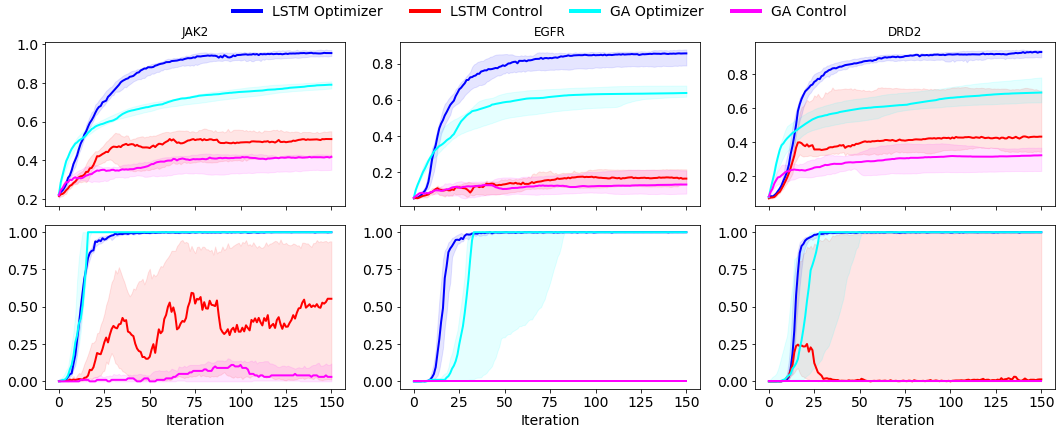

In [ ]:
results_root = './results'
results_dir = Path(results_root)


# some variables for axis labels
xlabel = None
ms = 'Mean score'
ra = 'Ratio active'

fig, axes = plt.subplots(nrows=2, ncols=len(
    chids), figsize=(15, 6), sharex=True)


optimizer = 'lstm_hc'
chids = next(os.walk(results_dir/optimizer))[1]

for i, chid in enumerate(chids):
    print(results_dir/optimizer/chid)

    preds_internal, preds_external, auc = load_chid(
        results_dir/optimizer/chid, order, hack=True)

    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                 ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=True, ax=axes[0][i], legend=False, lw=2)
    xlabel = 'Iteration'
    plot_wrapper(preds_internal, ratio_active_compound, name='ratio_active_compound', xlabel=xlabel,
                 ylabel=ra, col_dict=col_dict, legend_dict=legend_dict, skip=True, ax=axes[1][i], legend=False, lw=2)

    xlabel = None
    ms, ra = None, None
    
    
optimizer = 'graph_ga'
chids = next(os.walk(results_dir/optimizer))[1]
for i, chid in enumerate(chids):
    print(results_dir/optimizer/chid)

    preds_internal, preds_external, auc = load_chid(
        results_dir/optimizer/chid, order, hack=True)

    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                 ylabel=ms, col_dict=col_dict2, legend_dict=legend_dict, skip=True, ax=axes[0][i], legend=False, lw=2)
    xlabel = 'Iteration'
    plot_wrapper(preds_internal, ratio_active_compound, name='ratio_active_compound', xlabel=xlabel,
                 ylabel=ra, col_dict=col_dict2, legend_dict=legend_dict, skip=True, ax=axes[1][i], legend=False, lw=2)

    xlabel = None
    ms, ra = None, None

    

for i, chid in enumerate(chids):
    axes[0][i].set_title(chid_name[chid], fontsize=12)

def interleave(l1, l2):
    return [val for pair in zip(l1, l2) for val in pair]

lstm_lines = [Line2D([0], [0], color=color, lw=4) for k, color in col_dict.items() if k!='Split1_alt']
print(col_dict.keys())
ga_lines = [Line2D([0], [0], color=color, lw=4) for k, color in col_dict2.items() if k!='Split1_alt']
lines = lstm_lines+ga_lines
# lines = interleave(lstm_lines, ga_lines)

lstm_names = [f'LSTM {v}' for k, v in legend_dict.items() if k!='Split1_alt']
ga_names = [f'GA {v}' for k, v in legend_dict.items() if k!='Split1_alt']
names = lstm_names + ga_names
# names = interleave(lstm_names, ga_names)

fig.legend(lines, names, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.025), frameon=False)

fig.tight_layout()
plt.savefig(results_dir/optimizer/'all_curves.pdf')